En este archivo, voy a realizar el EDA (Exploratory Data Analysis) o Análisis Exploratorio de los Datos del archivo correspondiente a la tabla user_items.

In [11]:
# Importación de las librerías necesarias para trabajar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Leemos el archivo con el que vamos a trabajar

In [12]:
items = pd.read_parquet("user_items_complete.parquet")
items

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479
...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331
5153205,373330,All Is Dust,0,0,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331


Nuestro conjunto de datos originalmente cuenta con 5153209 filas y 5 columnas.

El método describe en Pandas nos ayuda a tener un resumen del conjunto de datos para todas las columnas numéricas excluyendo los valores NaN(Not-a-Number or missing ).

In [13]:
# Le pasamos cómo parametro include='all' para obtener todo el resumen adicional de nuestro conjunto de datos.
items.describe(include='all') 

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
count,5153209,5153209,5.153209e+06,5.153209e+06,5153209
unique,10978,10947,NaN,NaN,70912
top,205790,Dota 2 Test,NaN,NaN,phrostb
freq,49571,49571,NaN,NaN,7762
mean,NaN,NaN,9.914951e+02,9.104707e+00,NaN
std,NaN,NaN,5.418204e+03,1.403926e+02,NaN
min,NaN,NaN,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,3.400000e+01,0.000000e+00,NaN
75%,NaN,NaN,3.550000e+02,0.000000e+00,NaN


Vemos con esto que por ejemplo, hay 70912 usuarios con ID único, y que no hay núlos en ninguna de las 5 columnas.

Veamos ahora la información de este conjunto de datos.  

In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
dtypes: int64(2), object(3)
memory usage: 196.6+ MB


Veamos los valores nulos

In [15]:
items.isnull().sum() # No hay nulos

item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
user_id             0
dtype: int64

Veamos ahora la distribución con un histograma del tiempo invertido por los usuarios (playtime_forever).

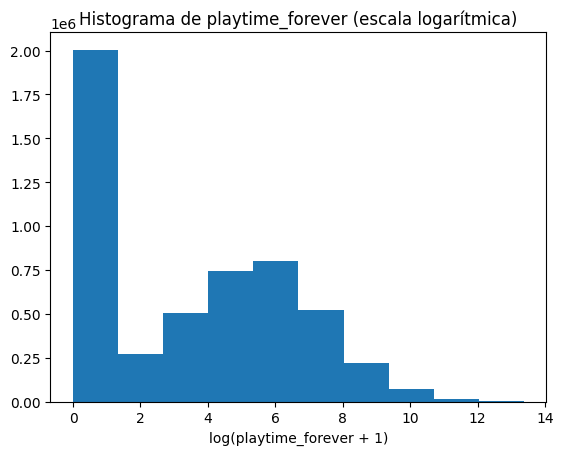

In [25]:
plt.hist(np.log1p(items['playtime_forever']))
plt.title('Histograma de playtime_forever (escala logarítmica)')
plt.xlabel('log(playtime_forever + 1)')
plt.show()

Tuve que aplicar una normalización a escala logaritmica porque el histograma no se veía correctamente.
En el eje x lo que vemos es una escala que va de la siguiente manera:

Tiempo = ln(x + 1), Ejemplo: x = 1, Tiempo = ln(1 + 1) = ln(2) ≈ 0,6931471806 

Ahora, ese x = 1 yo no sé en que unidades está, suponiendo que está en minutos, entonces el resultado también es en minutos. 

Si nos quedamos con x = 1, vemos que la gráfica llega hasta 2.00 * 1e6, ¿Que significa esto?
La respuesta es que hay más de 2.000.000 de filas dentro del Dataframe que están dentro de ese tiempo.

Hablando con un lenguaje un poco menos tecnico, tenemos 2 millones de filas en dónde usuarios (pueden repetirse algunos) jugaron entre 0 y 2 minutos (sin incluir ni el 0 ni el 2).  

- ln = Logaritmo natural, logaritmo base e
- 1e6 = 1 x 10^6 = 1.000.000. El eje Y está en escala de 1e6, osea de 1 millón.